In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

%matplotlib inline

## Реализация в `statsmodels`

Некоторые вспомогательные функции (практика по курсу математической статистике)

In [2]:
def draw_ecdf(sample, grid, cdf=None):
    ''' По сетке grid cтроит графики эмпирической функции распределения 
    и истинной (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        ecdf = ECDF(sample[:size])
        plt.scatter(sample[:size], np.zeros(size), alpha=0.4, label='sample')
        if cdf is not None:
            plt.plot(grid, cdf(grid), color='green', 
                     alpha=0.3, lw=2, label='true cdf')
        plt.plot(grid, ecdf(grid), color='red', label='ecdf')
        plt.legend()
        plt.grid(ls=':')
        plt.title('sample size = {}'.format(size))
    plt.show()

    
def draw_hist(sample, grid, pdf=None):
    ''' Строит гистограмму и по сетке grid график истинной плотности 
    (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        plt.hist(sample[:size], range=(grid.min(), grid.max()), 
                 bins=20, normed=True)
        if pdf is not None:
            plt.plot(grid, pdf(grid), color='green', alpha=0.3, lw=2)
    plt.show()


def draw_pdf(sample, grid, pdf=None):
    ''' По сетке grid cтроит графики ядерной оценки плотности 
    и истинной плотности (если она задана) для всей выборки и для 1/10 ее части.
    '''

    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        kernel_density = KDEUnivariate(sample[:size])
        kernel_density.fit()
        plt.scatter(sample[:size], np.zeros(size), 
                    alpha=0.4, label='sample')
        if pdf is not None:
            plt.plot(grid, pdf(grid), color='green', 
                     alpha=0.3, lw=2, label='true pdf')
        plt.plot(grid, kernel_density.evaluate(grid), 
                 color='red', label='kde')
        plt.legend()
        plt.grid(ls=':')
    plt.show()

Примениме реализованные выше функции к выборкам размера 500 из распределений $U[0, 1]$, $\mathcal{N}(0, 1)$ и $Exp(1)$.

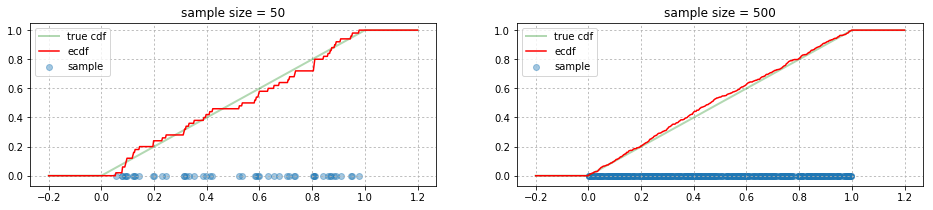

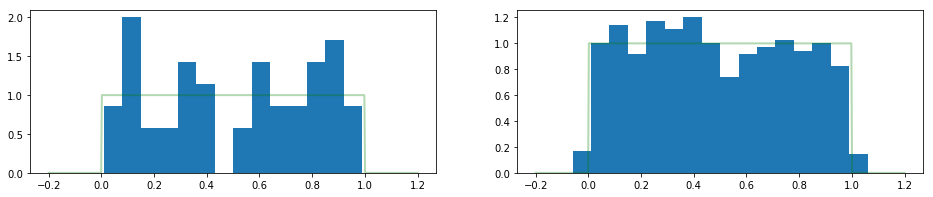

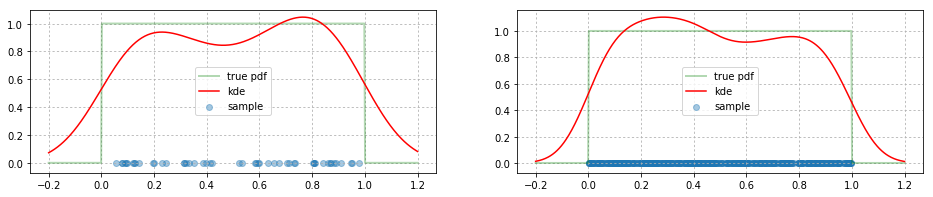

In [4]:
sample, grid = sps.uniform.rvs(size=500), np.linspace(-0.2, 1.2, 500)
draw_ecdf(sample, grid, cdf=sps.uniform.cdf)
draw_hist(sample, grid, pdf=sps.uniform.pdf)
draw_pdf(sample, grid, pdf=sps.uniform.pdf)

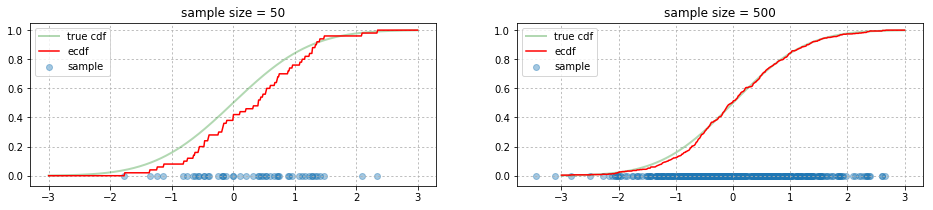

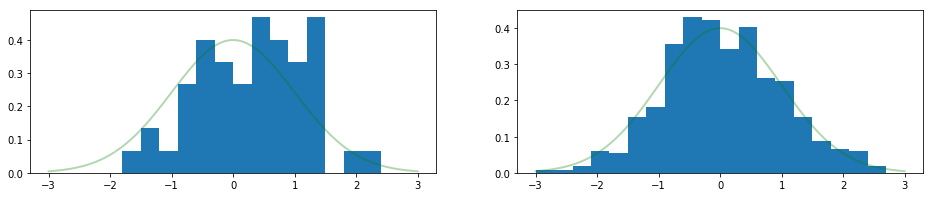

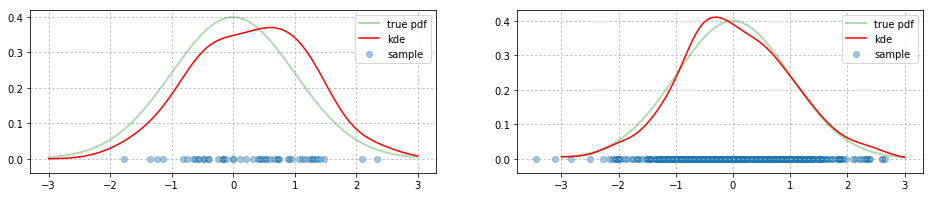

In [7]:
sample, grid = sps.norm.rvs(size=500), np.linspace(-3, 3, 500)
draw_ecdf(sample, grid, cdf=sps.norm.cdf)
draw_hist(sample, grid, pdf=sps.norm.pdf)
draw_pdf(sample, grid, pdf=sps.norm.pdf)

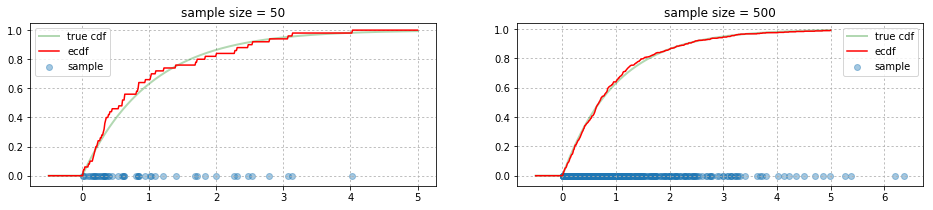

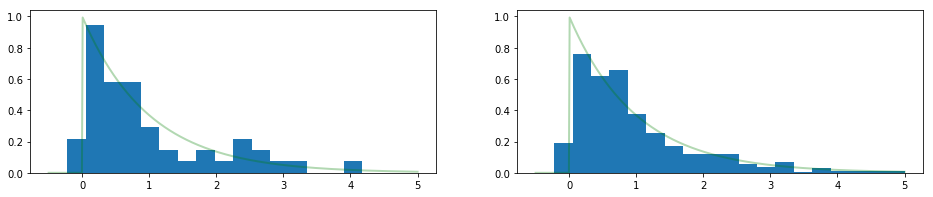

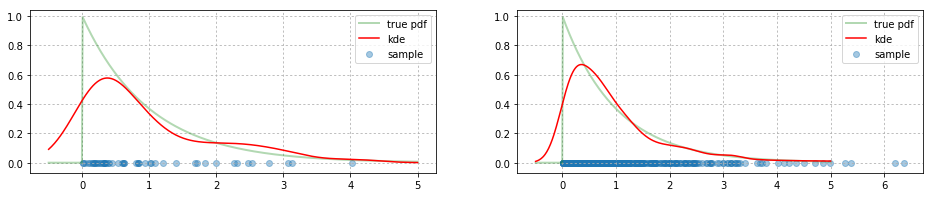

In [8]:
sample, grid = sps.expon.rvs(size=500), np.linspace(-0.5, 5, 500)
draw_ecdf(sample, grid, cdf=sps.expon.cdf)
draw_hist(sample, grid, pdf=sps.expon.pdf)
draw_pdf(sample, grid, pdf=sps.expon.pdf)

Исследуем вид ядерной оценки плотности в зависимости от вида ядра и его ширины.

Для этого сгенерируем выборку $X_1, ..., X_{200}$ из распределения $U[0, 1]$ и построим серию графиков для различной ширины гауссовского ядра, а затем другую серию графиков для различных типов ядер при фиксированной ширине.

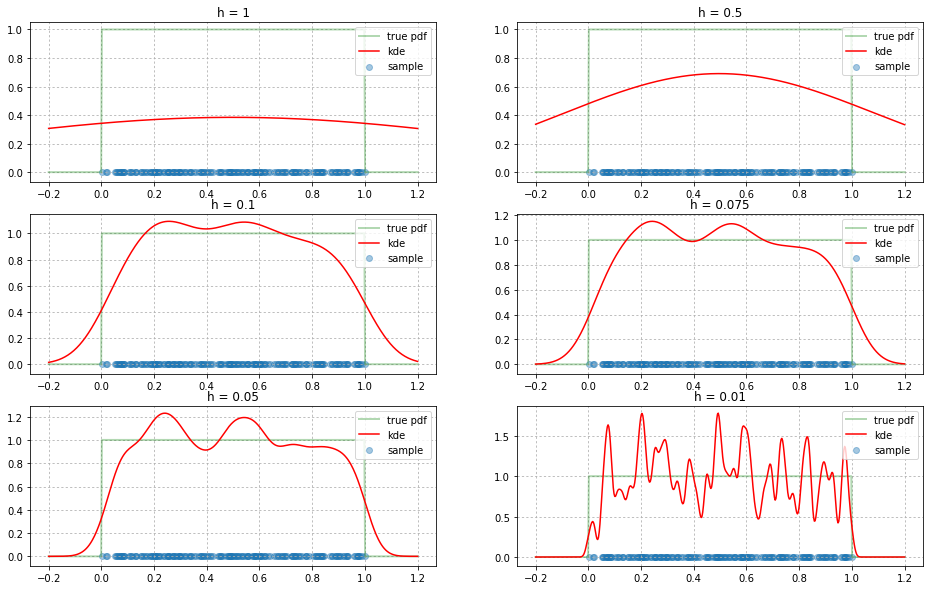

In [12]:
size = 200
sample = sps.uniform.rvs(size=size)
grid = np.linspace(-0.2, 1.2, 500)

plt.figure(figsize=(16, 10))
for i, bw in enumerate([1, 0.5, 0.1, 0.075, 0.05, 0.01]):
    plt.subplot(3, 2, i + 1)
    kernel_density = KDEUnivariate(sample)
    kernel_density.fit(bw=bw)
    plt.scatter(sample, np.zeros(size), alpha=0.4, label='sample')
    plt.plot(grid, sps.uniform.pdf(grid), color='green', 
             alpha=0.3, lw=2, label='true pdf')
    plt.plot(grid, kernel_density.evaluate(grid), 
             color='red', label='kde')
    plt.legend(loc=1)
    plt.grid(ls=':')
    plt.title('h = {}'.format(bw))
plt.show()

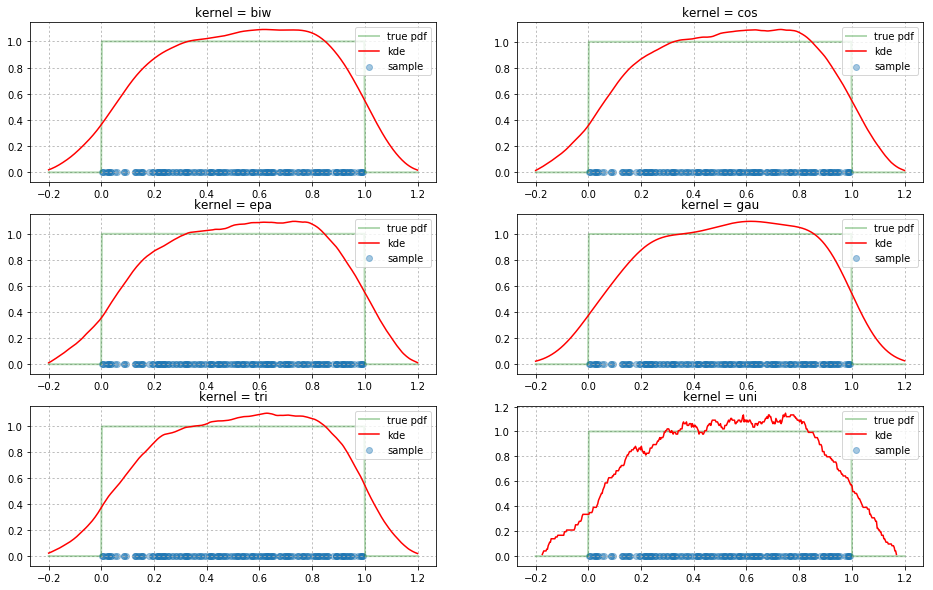

In [15]:
size = 200
sample = sps.uniform.rvs(size=size)
grid = np.linspace(-0.2, 1.2, 500)

plt.figure(figsize=(16, 10))
for i, kernel in enumerate(['biw', 'cos', 'epa', 
                            'gau', 'tri', 'uni']):
    plt.subplot(3, 2, i + 1)
    kernel_density = KDEUnivariate(sample)
    kernel_density.fit(kernel=kernel, fft=False)
    plt.scatter(sample, np.zeros(size), alpha=0.4, label='sample')
    plt.plot(grid, sps.uniform.pdf(grid), color='green', 
             alpha=0.3, lw=2, label='true pdf')
    plt.plot(grid, [kernel_density.evaluate(x) for x in grid], 
             color='red', label='kde')
    plt.legend(loc=1)
    plt.grid(ls=':')
    plt.title('kernel = {}'.format(kernel))
plt.show()

## Реализация в `scikit-learn`

In [16]:
from sklearn.neighbors import KernelDensity
from sklearn.datasets import load_iris

Графики для различной ширины окна на датасете Ирисы Фишера (первые две координаты)

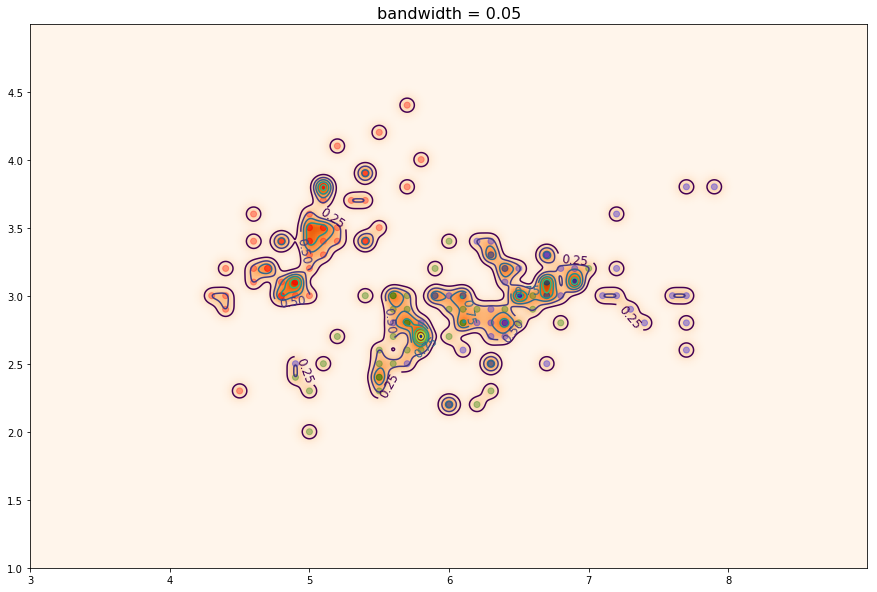

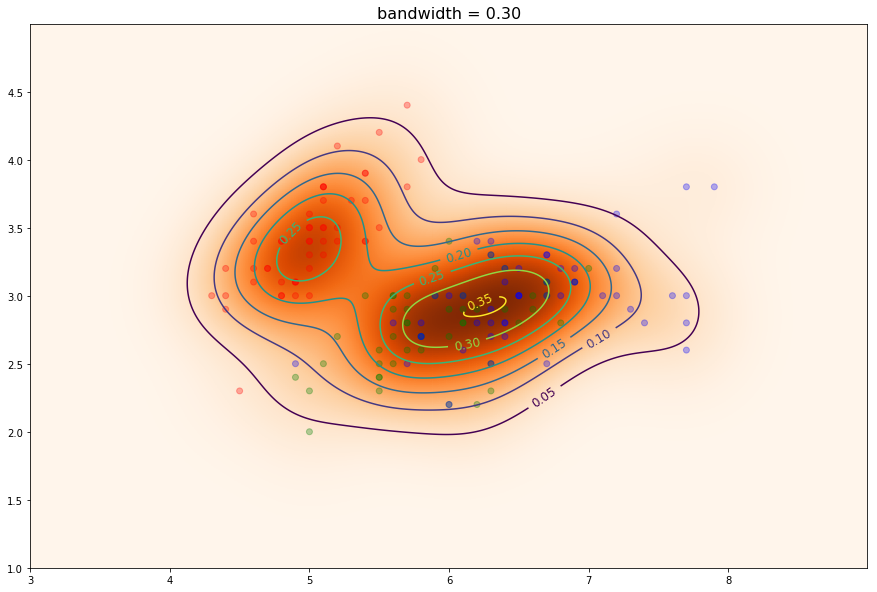

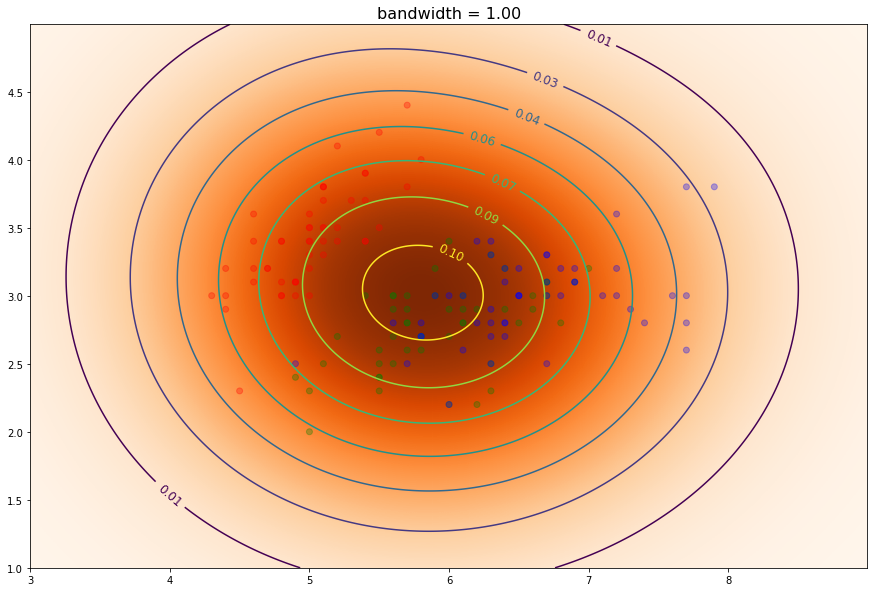

In [24]:
data = load_iris()
grid = np.mgrid[3:9:0.005, 1:5:0.005]
colors = np.array(['r'] * 50 + ['g'] * 50 + ['b'] * 50)

for bandwidth in [0.05, 0.3, 1]:
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(data['data'][:, :2])

    density = np.zeros_like(grid[0])
    s0, s1, s2 = grid.shape
    test = grid.transpose((1, 2, 0)).reshape((s1 * s2, 2))
    density = kde.score_samples(test)
    density = density.reshape((s1, s2))
    
    plt.figure(figsize=(15, 10))
    plt.pcolormesh(grid[0], grid[1], np.e ** density, cmap='Oranges')
    plt.scatter(data['data'][:, 0], data['data'][:, 1], alpha=0.3, color=colors)
    CS = plt.contour(grid[0], grid[1], np.e ** density)
    plt.clabel(CS, fontsize=12, inline=1,fmt='%1.2f')
    plt.title('bandwidth = %.2f' % bandwidth, fontsize=16)
    plt.show()

## Ядерная регрессия

https://github.com/jmetzen/kernel_regression